In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()
#Kyphosis is our target column

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


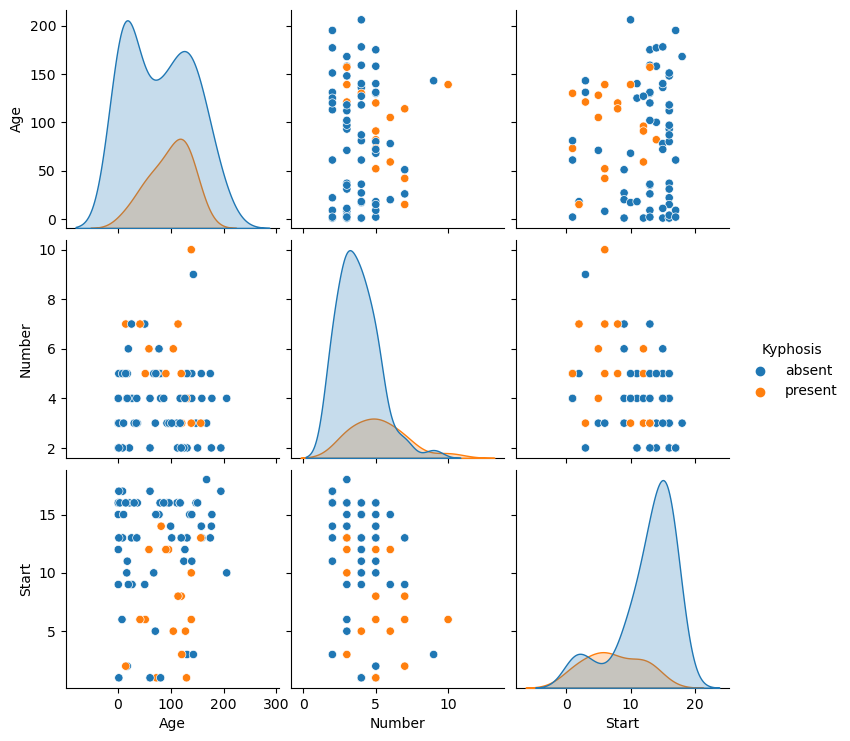

In [6]:
sns.pairplot(df,hue = 'Kyphosis')

In [7]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Kyphosis',axis = 1)
y = df['Kyphosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[18  1]
 [ 3  3]]


              precision    recall  f1-score   support

      absent       0.86      0.95      0.90        19
     present       0.75      0.50      0.60         6

    accuracy                           0.84        25
   macro avg       0.80      0.72      0.75        25
weighted avg       0.83      0.84      0.83        25



In [40]:
import graphviz


In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators=200)

In [28]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [29]:
rfc_pred = rfc.predict(X_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[19  0]
 [ 3  3]]


              precision    recall  f1-score   support

      absent       0.86      1.00      0.93        19
     present       1.00      0.50      0.67         6

    accuracy                           0.88        25
   macro avg       0.93      0.75      0.80        25
weighted avg       0.90      0.88      0.86        25



[Text(0.5416666666666666, 0.9375, 'Start <= 12.5\ngini = 0.316\nsamples = 56\nvalue = [45, 11]\nclass = Absent'),
 Text(0.3333333333333333, 0.8125, 'Age <= 34.5\ngini = 0.486\nsamples = 24\nvalue = [14, 10]\nclass = Absent'),
 Text(0.16666666666666666, 0.6875, 'Number <= 6.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Absent'),
 Text(0.08333333333333333, 0.5625, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Absent'),
 Text(0.25, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Present'),
 Text(0.5, 0.6875, 'Age <= 141.0\ngini = 0.492\nsamples = 16\nvalue = [7, 9]\nclass = Present'),
 Text(0.4166666666666667, 0.5625, 'Age <= 81.0\ngini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = Present'),
 Text(0.25, 0.4375, 'Age <= 56.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = Absent'),
 Text(0.16666666666666666, 0.3125, 'Start <= 7.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Present'),
 Text(0.08333333333333333, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [0,

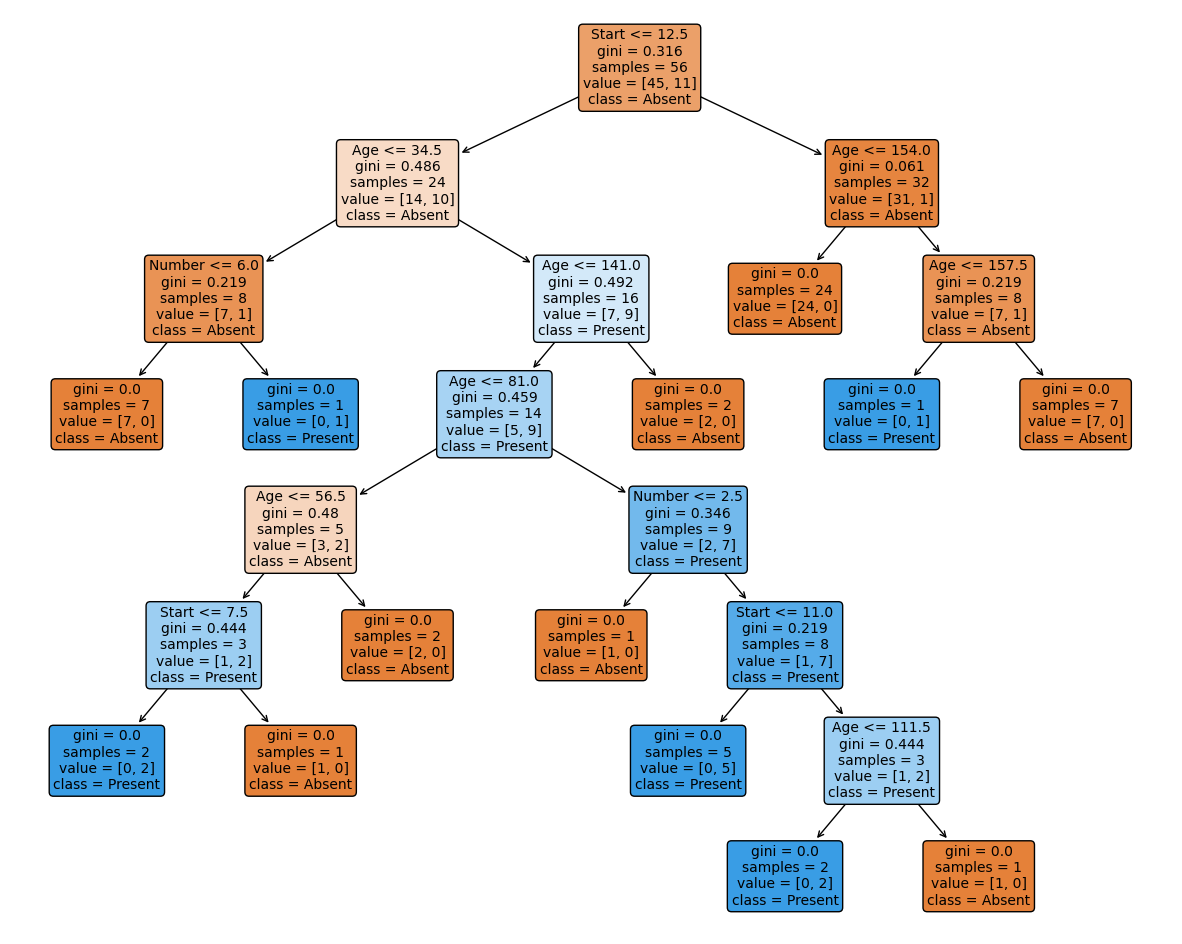

In [52]:
from sklearn import tree
plt.figure(figsize=(15,12))
tree.plot_tree(dtree,filled = True,fontsize = 10,feature_names=X_train.columns,rounded=True,
               class_names=['Absent','Present'])